# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_code = []
cities_latlng = {}

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city.title() not in cities:
        cities.append(city.title())
        cities_latlng[city.title()]=lat_lng


In [41]:
#Testing Citipy Module output
test_city = citipy.nearest_city(lats[1], lngs[1]).city_name
#Print test result
print(test_city)

businga


In [42]:
# Print the city count to confirm sufficient count
len(cities_latlng)
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [44]:
#Testing API query
city = 'bluff'
response = requests.get(query_url + city).json()
response

{'coord': {'lon': 149.07, 'lat': -23.58},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 20.5,
  'pressure': 1017.85,
  'humidity': 61,
  'temp_min': 20.5,
  'temp_max': 20.5,
  'sea_level': 1017.85,
  'grnd_level': 995.15},
 'wind': {'speed': 4.41, 'deg': 120.5},
 'clouds': {'all': 8},
 'dt': 1551126032,
 'sys': {'message': 0.0029,
  'country': 'AU',
  'sunrise': 1551038230,
  'sunset': 1551083756},
 'id': 2175403,
 'name': 'Bluff',
 'cod': 200}

In [45]:
#Testin output of API query
response['main']['humidity']
#response['coord']

61

In [6]:

# set up lists to hold reponse info
lat = []
temp = []
humidity = []
cloudiness = []
windspeed = []
city_list = []
row_count = 1

# # Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] == '404':
        message = response['message']
        print(f'{message}')
    else:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        city_list.append(response['name'])
        print('------------------------')
        print(f"Proceesing: City # {row_count} | {response['name']} {response['sys']['country']}")
        print(query_url + city)
        row_count += 1


------------------------
Proceesing: City # 1 | Los Llanos de Aridane ES
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Los Llanos De Aridane
city not found
------------------------
Proceesing: City # 2 | Rikitea PF
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Rikitea
city not found
------------------------
Proceesing: City # 3 | Port Alfred ZA
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Port Alfred
------------------------
Proceesing: City # 4 | Hilo US
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Hilo
------------------------
Proceesing: City # 5 | Vaini IN
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Vaini
------------------------
Proceesing: City # 6 | Te Anau NZ
http://api.openweathermap.org/data/2.5/weathe

------------------------
Proceesing: City # 49 | Kushima JP
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Kushima
------------------------
Proceesing: City # 50 | Lakselv NO
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Lakselv
------------------------
Proceesing: City # 51 | Tiksi RU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Tiksi
------------------------
Proceesing: City # 52 | Pangkalanbuun ID
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Pangkalanbuun
------------------------
Proceesing: City # 53 | Hasaki JP
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Hasaki
------------------------
Proceesing: City # 54 | Tasiilaq GL
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&un

------------------------
Proceesing: City # 97 | Punta Arenas CL
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Punta Arenas
------------------------
Proceesing: City # 98 | Salinas US
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Salinas
------------------------
Proceesing: City # 99 | Cabras CO
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Cabras
------------------------
Proceesing: City # 100 | Chifeng CN
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Chifeng
------------------------
Proceesing: City # 101 | Leningradskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Leningradskiy
------------------------
Proceesing: City # 102 | Vila Velha BR
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf72

------------------------
Proceesing: City # 145 | Cockburn Town TC
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Cockburn Town
city not found
------------------------
Proceesing: City # 146 | Filadelfia PY
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Filadelfia
------------------------
Proceesing: City # 147 | Pisco PE
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Pisco
city not found
------------------------
Proceesing: City # 148 | Kaltasy RU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Kaltasy
------------------------
Proceesing: City # 149 | Luderitz NA
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Luderitz
------------------------
Proceesing: City # 150 | Hamilton BM
http://api.openweathermap.org/data/2.5/wea

------------------------
Proceesing: City # 193 | Vardo US
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Vardo
------------------------
Proceesing: City # 194 | Leua AO
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Leua
------------------------
Proceesing: City # 195 | Ilulissat GL
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Ilulissat
city not found
------------------------
Proceesing: City # 196 | Dormidontovka RU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Dormidontovka
------------------------
Proceesing: City # 197 | Sinegorskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Sinegorskiy
------------------------
Proceesing: City # 198 | Mandalgovi MN
http://api.openweathermap.org/data/2.5/weather?appid=03ac

------------------------
Proceesing: City # 241 | Boyolangu ID
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Boyolangu
------------------------
Proceesing: City # 242 | Estelle US
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Estelle
------------------------
Proceesing: City # 243 | Antofagasta CL
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Antofagasta
------------------------
Proceesing: City # 244 | Cherskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Cherskiy
------------------------
Proceesing: City # 245 | Kannangad IN
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Kannangad
------------------------
Proceesing: City # 246 | Santo Estevao BR
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224fe

------------------------
Proceesing: City # 289 | Sept-Iles CA
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Sept-Iles
------------------------
Proceesing: City # 290 | Roald NO
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Roald
------------------------
Proceesing: City # 291 | Deputatskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Deputatskiy
------------------------
Proceesing: City # 292 | Tieli CN
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Tieli
------------------------
Proceesing: City # 293 | Prykolotne UA
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Prykolotne
------------------------
Proceesing: City # 294 | Tukan RU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af

------------------------
Proceesing: City # 338 | Georgiyevskoye RU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Georgiyevskoye
city not found
------------------------
Proceesing: City # 339 | Namibe AO
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Namibe
------------------------
Proceesing: City # 340 | Kingman US
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Kingman
------------------------
Proceesing: City # 341 | Mezofalva HU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Mezofalva
------------------------
Proceesing: City # 342 | San Patricio PY
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=San Patricio
------------------------
Proceesing: City # 343 | Tynda RU
http://api.openweathermap.org/data/2.5/weather?app

city not found
city not found
city not found
------------------------
Proceesing: City # 385 | Tarn Taran IN
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Tarn Taran
------------------------
Proceesing: City # 386 | Kloulklubed PW
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Kloulklubed
------------------------
Proceesing: City # 387 | Lazarev RU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Lazarev
------------------------
Proceesing: City # 388 | Ostrogozhsk RU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Ostrogozhsk
------------------------
Proceesing: City # 389 | Taunggyi MM
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Taunggyi
------------------------
Proceesing: City # 390 | Janesville US
http://api.openwe

------------------------
Proceesing: City # 433 | Benton Harbor US
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Benton Harbor
------------------------
Proceesing: City # 434 | Luanda AO
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Luanda
------------------------
Proceesing: City # 435 | Mujiayingzi CN
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Mujiayingzi
------------------------
Proceesing: City # 436 | Colares PT
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Colares
------------------------
Proceesing: City # 437 | Nelidovo RU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Nelidovo
------------------------
Proceesing: City # 438 | Kavaratti IN
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf

------------------------
Proceesing: City # 481 | Rio Gallegos AR
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Rio Gallegos
------------------------
Proceesing: City # 482 | Mamallapuram IN
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Mamallapuram
------------------------
Proceesing: City # 483 | Husavik CA
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Husavik
city not found
------------------------
Proceesing: City # 484 | Kalawit PH
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Kalawit
------------------------
Proceesing: City # 485 | Kolyvan RU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Kolyvan
------------------------
Proceesing: City # 486 | Sundsvall SE
http://api.openweathermap.org/data/2.5/weather?appid

city not found
------------------------
Proceesing: City # 529 | Bathsheba BB
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Bathsheba
------------------------
Proceesing: City # 530 | Baracoa CU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Baracoa
------------------------
Proceesing: City # 531 | Flinders AU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Flinders
------------------------
Proceesing: City # 532 | Inhambane MZ
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Inhambane
------------------------
Proceesing: City # 533 | Kathmandu NP
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Kathmandu
------------------------
Proceesing: City # 534 | Mecca SA
http://api.openweathermap.org/data/2.5/weather?appid=03acb0222

------------------------
Proceesing: City # 578 | Kajaani FI
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Kajaani
------------------------
Proceesing: City # 579 | Denpasar ID
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Denpasar
------------------------
Proceesing: City # 580 | Avera US
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Avera
------------------------
Proceesing: City # 581 | Fairbanks US
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Fairbanks
------------------------
Proceesing: City # 582 | Isangel VU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7&units=metric&q=Isangel
------------------------
Proceesing: City # 583 | Iskateley RU
http://api.openweathermap.org/data/2.5/weather?appid=03acb02224feaf727bd1a0ce04af49d7

#### Resulting DataFrame should contain:

* City Name
* Latitude
* Temp
* Humidity
* Cloudiness
* Windspeed


In [46]:
#Create DataFrame and add lists containing data points under heading describing the list.
cities_df= pd.DataFrame()
cities_df['Cities']=city_list
cities_df['Latitude']= lat
cities_df['Temp']=temp
cities_df['Humidity']= humidity
cities_df['Cloud Cover']= cloudiness
cities_df['Wind Speed']= windspeed
#Preview output
cities_df.head()

,Cities,Latitude,Temp,Humidity,Cloud Cover,Wind Speed
0,Los Llanos de Aridane,28.66,18.00,42,0,1.50
1,Rikitea,-23.12,26.64,100,80,5.57
2,Port Alfred,-33.59,19.72,96,48,3.02
3,Hilo,19.71,22.00,73,90,4.60
4,Vaini,15.34,20.00,56,0,1.57


In [47]:
#Run a count on DataFrame to make sure columns match.
cities_df.count()

Cities         584
Latitude       584
Temp           584
Humidity       584
Cloud Cover    584
Wind Speed     584
dtype: int64

#### What do we gleam from the Data Description
* The mean Latitude should tell us if the random sampling skews more North or South
It appears that several random samplings skew more North than South. This would be a data analysis limitation. The reasons for this limitation may be because there in more information in Citipy for cities in the Northern hemishpere. Or maybe there are actually more cities in the Northern hemisphere. 

In [48]:
cities_df.describe()

,Latitude,Temp,Humidity,Cloud Cover,Wind Speed
count,584.000000,584.000000,584.000000,584.000000,584.000000
mean,21.549435,9.072209,74.181507,34.464041,3.700668
std,33.331262,16.382822,21.070931,34.395671,2.863732
min,-54.810000,-43.040000,0.000000,0.000000,0.220000
25%,-5.622500,-2.552500,62.000000,0.000000,1.500000
50%,27.925000,12.450000,78.000000,20.000000,2.985000
75%,49.655000,23.835000,92.000000,75.000000,4.940000
max,78.220000,36.090000,100.000000,100.000000,22.100000


### Convert Raw Data to DataFrame

* Display the DataFrame

In [49]:
#Display results of cities query stored in DataFrame
cities_df

,Cities,Latitude,Temp,Humidity,Cloud Cover,Wind Speed
0,Los Llanos de Aridane,28.66,18.00,42,0,1.50
1,Rikitea,-23.12,26.64,100,80,5.57
2,Port Alfred,-33.59,19.72,96,48,3.02
3,Hilo,19.71,22.00,73,90,4.60
4,Vaini,15.34,20.00,56,0,1.57
5,Te Anau,-45.41,11.84,51,0,1.32
6,Thompson,55.74,-26.00,56,5,4.10
7,Cape Town,-33.93,19.00,100,0,4.60
8,Doka,13.52,26.04,30,0,5.17
9,Esperance,10.24,23.00,94,75,2.60


* Export the city data into a .csv.

In [50]:
#Save DataFrame to CSV format
cities_df.to_csv('city_weather.csv', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

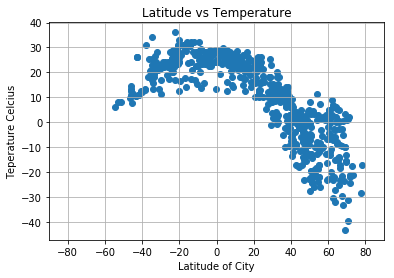

In [35]:
#Plot Latitude vs Temperature
plt.scatter(lat, temp, marker='o')

# Add chart labels
plt.title("Latitude vs Temperature")
plt.ylabel("Teperature Celcius")
plt.xlabel("Latitude of City")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("lat_vs_temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

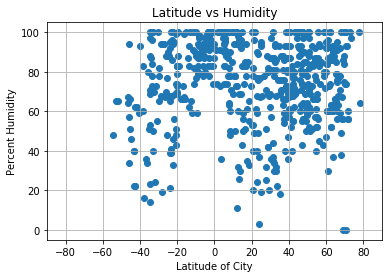

In [36]:
#Plot Latitude vs Humidity
plt.scatter(lat, humidity, marker='o')

# Add chart labels
plt.title("Latitude vs Humidity")
plt.ylabel("Percent Humidity")
plt.xlabel("Latitude of City")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

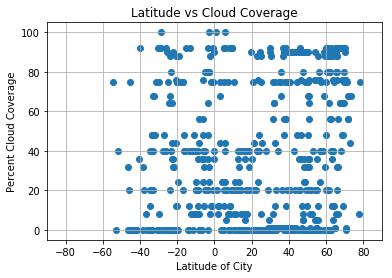

In [37]:
#Plot Latitude vs Cloudiness
plt.scatter(lat, cloudiness, marker='o')

# Add chart labels
plt.title("Latitude vs Cloud Coverage")
plt.ylabel("Percent Cloud Coverage")
plt.xlabel("Latitude of City")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("lat_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

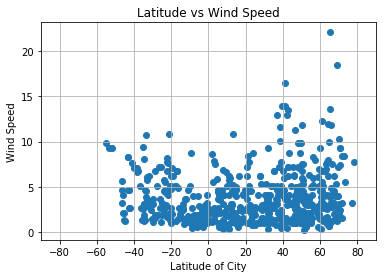

In [38]:
#Plot Latitude vs Wind Speed
plt.scatter(lat, windspeed, marker='o')

# Add chart labels
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude of City")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("lat_vs_windspeed.png")

# Show plot
plt.show()

### The End